# Plot correlation between compartment and mC/ATAC/RNA

In [1]:
import os
import cooler
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import cm as cm
import seaborn as sns
from scipy.stats import zscore, pearsonr, norm

mpl.style.use('default')
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'Helvetica'


In [2]:
leg = ['L23_IT', 'L4_IT', 'L5_IT', 'L6_IT', 'L6_IT_Car3', 'L56_NP', 'L6_CT', 'L6b', 'L5_ET', 'Amy', 
       'Lamp5', 'Lamp5_LHX6', 'Sncg', 'Vip', 'Pvalb', 'Pvalb_ChC', 'Sst', 'CHD7', 
       'MSN_D1', 'MSN_D2', 'Foxp2', 'SubCtx', 
       'ASC', 'ODC', 'OPC', 'MGC', 'PC', 'EC', 'VLMC'
      ]
legname = ['L2/3-IT', 'L4-IT', 'L5-IT', 'L6-IT', 'L6-IT-Car3', 'L5/6-NP', 'L6-CT', 'L6b', 'L5-ET', 'Amy-Exc', 
       'Lamp5', 'Lamp5-Lhx6', 'Sncg', 'Vip', 'Pvalb', 'Pvalb-ChC', 'Sst', 'Chd7', 
       'MSN-D1', 'MSN-D2', 'Foxp2', 'SubCtx-Cplx', 
       'ASC', 'ODC', 'OPC', 'MGC', 'PC', 'EC', 'VLMC'
      ]
leg2name = {xx:yy for xx,yy in zip(leg, legname)}


In [3]:
leg = {'exc': ['L23_IT', 'L4_IT', 'L5_IT', 'L6_IT', 'L6_IT_Car3', 'L56_NP', 'L6_CT', 'L6b', 'Amy'], 
       'inh': ['Lamp5', 'Lamp5_LHX6', 'Sncg', 'Vip', 'Pvalb', 'Pvalb_ChC', 'Sst', 'CHD7'], 
       'msn': ['MSN_D1', 'MSN_D2', 'Foxp2'], 
       'sub': ['SubCtx'], 
       'glia': ['ASC', 'ODC', 'OPC'], 
       'mgc': ['MGC'], 
       'smc': ['PC'], 
       'endo': ['EC'], 
       'fibro': ['VLMC'],
      }
leg['neu'] = leg['exc'] + leg['inh'] + leg['msn'] + leg['sub']
leg['all'] = leg['neu'] + leg['glia'] + leg['mgc'] + leg['smc'] + leg['endo'] + leg['fibro']


In [4]:
group_name = 'neu'

In [5]:
leg = pd.Index(leg[group_name])
legname = leg.map(leg2name)
res = 100000

In [6]:
indir = f'/home/jzhou_salk_edu/sky_workdir/hba/compartment_majortype/diff/{group_name}/'


In [7]:
comp = pd.read_csv(f'{indir}DifferentialResult/fdr_result/differential.intra_sample_combined.pcQnm.bedGraph', sep='\t', header=0, index_col=None)
comp.index = comp['chr'] + '_' + (comp['start'] // res).astype(str)
comp


,chr,start,end,L23_IT_100Kb,L4_IT_100Kb,L5_IT_100Kb,L6_IT_100Kb,L6_IT_Car3_100Kb,L56_NP_100Kb,L6_CT_100Kb,...,Sst,CHD7,MSN_D1,MSN_D2,Foxp2,SubCtx,sample_maha,pval,padj,dist_clust
chr10_2,chr10,200000,300000,1.20141,1.40148,1.12274,0.91856,0.71971,1.45364,1.35924,...,1.60003,1.79399,1.18581,1.14140,1.64998,1.77294,78.797991,6.274326e-09,1.654675e-08,1
chr10_3,chr10,300000,400000,1.67618,1.43001,1.33450,1.32691,0.51945,1.22911,1.53759,...,1.69831,1.69831,1.61143,1.15231,1.94190,2.06830,101.685104,6.282661e-13,1.940153e-12,1
chr10_4,chr10,400000,500000,1.27442,1.33094,1.21215,1.43974,0.96214,1.59233,1.40148,...,1.58100,1.61143,1.64171,1.62984,1.69065,1.68152,28.864611,9.045962e-02,1.563036e-01,1
chr10_5,chr10,500000,600000,1.43001,1.39806,1.69428,1.60003,0.57439,1.61143,1.37993,...,1.76052,1.79952,1.58100,1.83248,1.55484,2.17604,110.773702,1.418987e-14,4.640257e-14,1
chr10_6,chr10,600000,700000,1.43350,1.69065,1.44978,1.66232,1.23573,1.26750,1.73916,...,1.90078,1.82624,1.85399,1.42406,1.60286,1.35578,8.253318,9.900547e-01,1.000000e+00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chr9_1367,chr9,136700000,136800000,2.53781,2.49765,2.43707,2.53781,2.64364,2.50284,2.61332,...,2.49765,2.30178,2.55214,2.61332,2.42730,2.37386,0.208439,1.000000e+00,1.000000e+00,1
chr9_1368,chr9,136800000,136900000,2.25818,2.34290,2.30178,2.27476,2.20722,2.28698,2.49765,...,2.35196,2.29048,2.25515,2.25515,2.17299,2.22961,1.756256,1.000000e+00,1.000000e+00,1
chr9_1369,chr9,136900000,137000000,2.26494,2.13128,2.34837,2.37084,2.33576,2.35196,2.46547,...,2.39138,2.22605,2.35521,2.31751,2.40634,2.33914,0.318975,1.000000e+00,1.000000e+00,1
chr9_1370,chr9,137000000,137100000,2.35196,2.04449,2.36778,2.18888,2.30471,2.28174,2.42333,...,2.35761,2.25818,2.30178,2.18888,2.30759,2.36778,0.952000,1.000000e+00,1.000000e+00,1


In [8]:
binall = comp[['chr', 'start', 'end', 'sample_maha', 'pval', 'padj']]
comp = comp[leg]


In [10]:
mcg = pd.read_hdf(f'{outdir}comp_mCG.hdf', key='data')
mch = pd.read_hdf(f'{outdir}comp_mCH.hdf', key='data')
atac = pd.read_hdf(f'{outdir}comp_ATAC.hdf', key='data')


In [20]:
legatac = atac.columns

In [11]:
binall = pd.read_hdf(f'{outdir}bin_stats.hdf', key='data')


In [12]:
# selb = (binall['padj']<1e-3)
selb = zscore(binall['sample_maha'])>norm.isf(0.025)
print(selb.sum())


1024


In [13]:
tmpcg = mcg.loc[selb].values
tmpcg = zscore(tmpcg, axis=1)


In [14]:
tmpch = mch.loc[selb].values
tmpch = zscore(tmpch, axis=1)


In [15]:
tmpatac = atac.loc[selb].values
tmpatac = zscore(tmpatac, axis=1)


In [16]:
tmp3c = comp.loc[selb].values
tmp3c = zscore(tmp3c, axis=1)


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


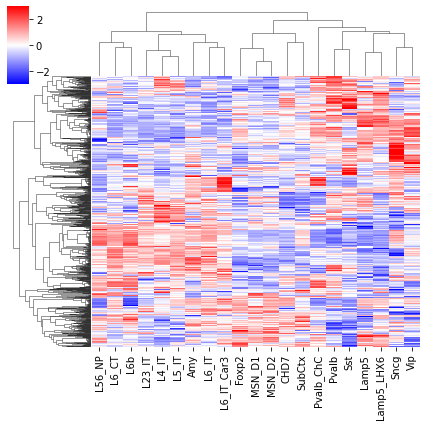

In [17]:
cg = sns.clustermap(tmp3c, cmap='bwr', vmin=-3, vmax=3, metric='cosine', xticklabels=leg, yticklabels=[], figsize=(6,6))


In [18]:
rorder = cg.dendrogram_row.reordered_ind.copy()
corder = cg.dendrogram_col.reordered_ind.copy()

In [21]:
idxatac = np.arange(len(leg))[leg.isin(legatac)]
corderatac = [xx for xx in corder if xx in idxatac]

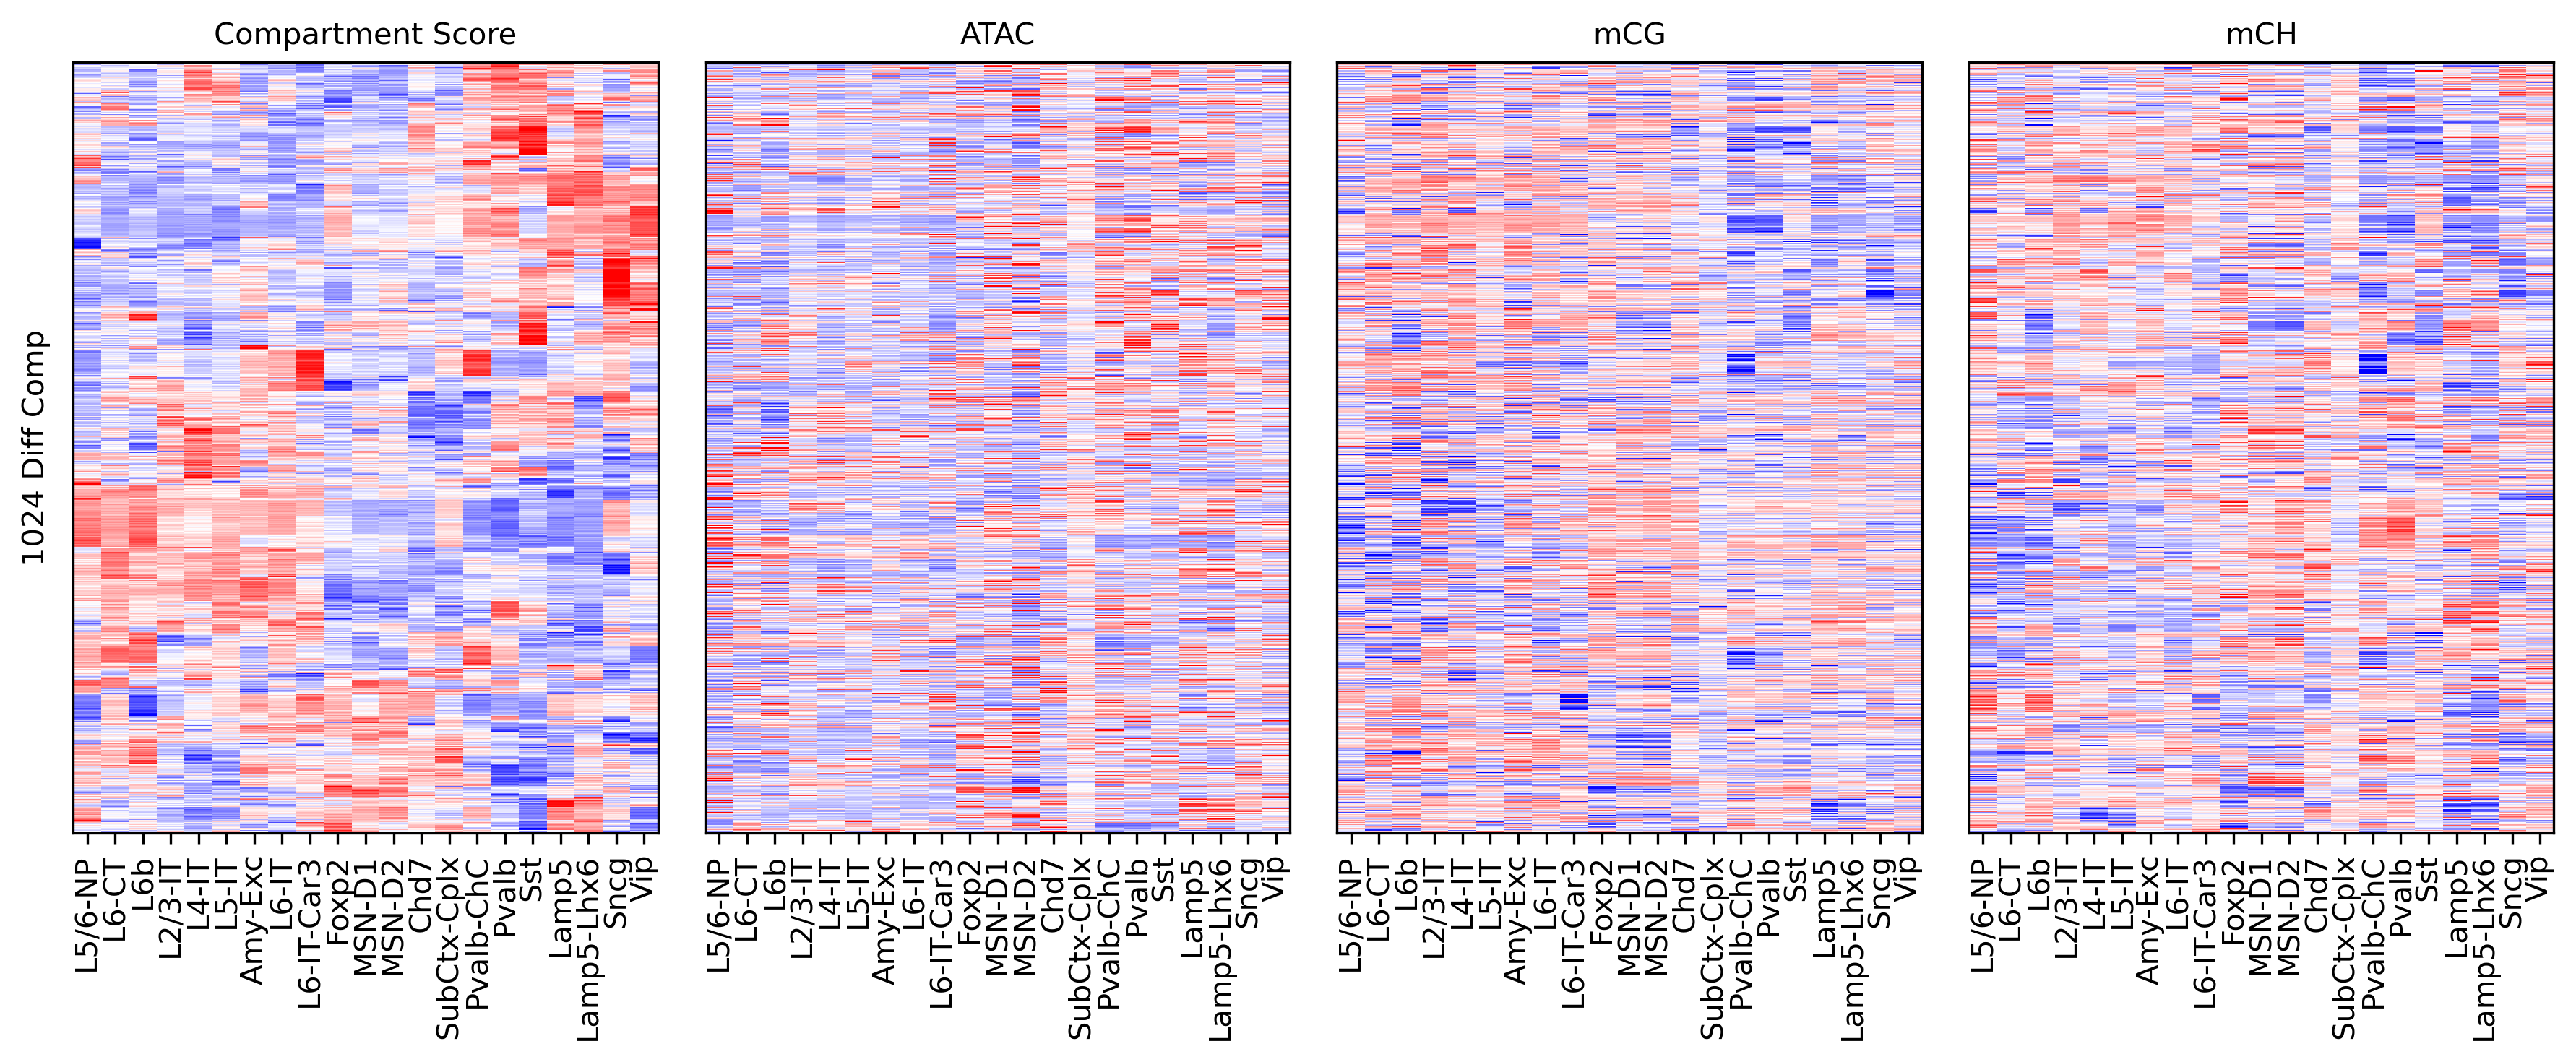

In [22]:
fig, axes = plt.subplots(1, 4, sharey='all', figsize=(12,5), dpi=300)

ax = axes[0]
ax.imshow(tmp3c[np.ix_(rorder, corder)], cmap='bwr', aspect='auto', vmin=-3, vmax=3, interpolation='none')
ax.set_title('Compartment Score', fontsize=10)
# sns.despine(ax=ax, left=True, bottom=True)
ax.set_xticks(np.arange(len(leg)))
ax.set_xticklabels(legname[corder], rotation=90)
ax.set_yticks([])
ax.set_ylabel(f'{tmp3c.shape[0]} Diff Comp')

ax = axes[1]
ax.imshow(tmpatac[np.ix_(rorder, corderatac)], cmap='bwr', aspect='auto', vmin=-3, vmax=3, interpolation='none')
ax.set_title('ATAC', fontsize=10)
# sns.despine(ax=ax, left=True, bottom=True)
ax.set_xticks(np.arange(len(legatac)))
ax.set_xticklabels(legname[corderatac], rotation=90)

ax = axes[2]
ax.imshow(tmpcg[np.ix_(rorder, corder)], cmap='bwr', aspect='auto', vmin=-3, vmax=3, interpolation='none')
ax.set_title('mCG', fontsize=10)
# sns.despine(ax=ax, left=True, bottom=True)
ax.set_xticks(np.arange(len(leg)))
ax.set_xticklabels(legname[corder], rotation=90)

ax = axes[3]
ax.imshow(tmpch[np.ix_(rorder, corder)], cmap='bwr', aspect='auto', vmin=-3, vmax=3, interpolation='none')
ax.set_title('mCH', fontsize=10)
# sns.despine(ax=ax, left=True, bottom=True)
ax.set_xticks(np.arange(len(leg)))
ax.set_xticklabels(legname[corder], rotation=90)


plt.tight_layout()
# plt.savefig(f'majortype_{group_name}_diffcomp_3C_Epi.pdf', transparent=True)


Text(0, 0.5, 'PCC with Comp Score')

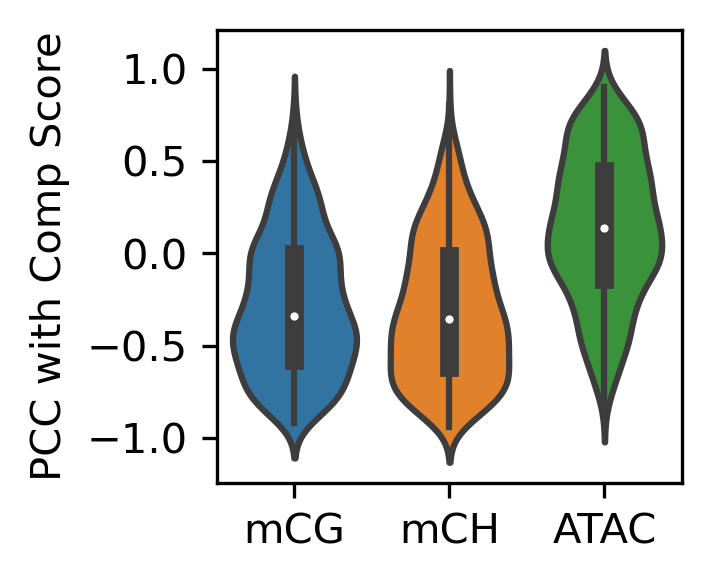

In [23]:
# fig, ax = plt.subplots(figsize=(2,2), dpi=300)
# sns.violinplot([binall.loc[selb, 'mCH_corr'], binall.loc[selb, 'mCG_corr']], ax=ax)
# ax.set_xticklabels(['mCH', 'mCG'])

fig, ax = plt.subplots(figsize=(2,2), dpi=300)
sns.violinplot([binall.loc[selb, 'mCG_corr'], 
                binall.loc[selb, 'mCH_corr'], 
                binall.loc[selb, 'ATAC_corr']], ax=ax)
ax.set_xticklabels(['mCG', 'mCH', 'ATAC'])
ax.set_ylabel('PCC with Comp Score')
# plt.savefig(f'majortype_{group_name}_diffcomp_epicorr.pdf', transparent=True)


In [24]:
print(binall.loc[selb, 'mCG_corr'].median(), 
      binall.loc[selb, 'mCH_corr'].median(),
      binall.loc[selb, 'ATAC_corr'].median(),
      selb.sum()
     )

-0.33889508844252425 -0.35702766374600814 0.13930586635771205 1024


## TSS stats vs corr

In [25]:
expr = pd.read_hdf('/home/jzhou_salk_edu/sky_workdir/hba/rna_majortype/cluster_expr.hdf')
stats = pd.read_hdf(f'/home/jzhou_salk_edu/sky_workdir/hba/rna_majortype/{group_name}_deg_stats.hdf')
genefilter = (stats['stats']>0)
expr = expr.loc[:, genefilter]
stats = stats.loc[genefilter]


In [26]:
data = pd.read_csv(f'/home/jzhou_salk_edu/sky_workdir/hba/ref/hg38.main.100kbin.TSS.slop2k.txt', sep='\t', header=None, index_col=None)
data['bin_id'] = data[0] + '_' + (data[1] // res).astype(str)
data = data.rename({6:'gene_id'}, axis=1)
data = data.loc[(data['bin_id'].isin(binall.index)) & (data['gene_id'].isin(stats.index))]
data['maha'] = binall.loc[data['bin_id'].values, 'sample_maha'].values
data['kruskal'] = stats.loc[data['gene_id'].values, 'stats'].values


In [27]:
tmp3c = comp.loc[data['bin_id'].values].values
tmp3c = zscore(tmp3c, axis=1)


In [28]:
tmprna = expr.loc[leg, data['gene_id'].values].T.values
tmprna = zscore(tmprna, axis=1)


In [29]:
data['corr'] = [pearsonr(xx, yy)[0] for xx,yy in zip(tmp3c, tmprna)]

In [30]:
data = data.drop([0,1,2,3,4,5,7,8], axis=1)
data

,gene_id,bin_id,maha,kruskal,corr
148,ENSG00000078369.18,chr1_18,0.018071,236.559842,0.219052
149,ENSG00000231050.1,chr1_18,0.018071,106.481967,0.150721
150,ENSG00000178821.13,chr1_19,0.119261,190.731327,-0.166029
151,ENSG00000169885.10,chr1_19,0.119261,86.157369,-0.337049
152,ENSG00000142609.18,chr1_20,0.090741,1768.295474,-0.417539
...,...,...,...,...,...
68835,ENSG00000188130.14,chr22_502,188.442765,925.507190,0.096120
68836,ENSG00000185386.15,chr22_502,188.442765,2880.146129,-0.079567
68837,ENSG00000100429.18,chr22_502,188.442765,364.252054,0.111640
68838,ENSG00000273253.2,chr22_502,188.442765,511.799988,0.049380


<AxesSubplot:xlabel='maha', ylabel='kruskal'>

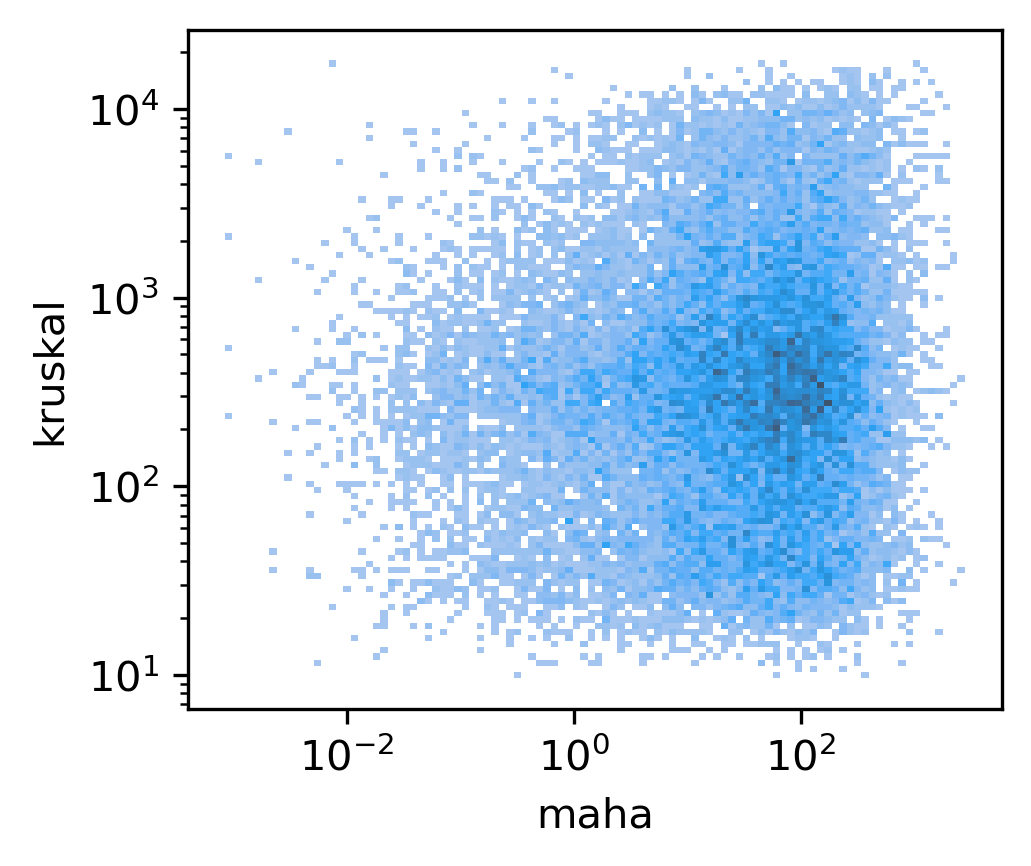

In [31]:
fig, ax = plt.subplots(figsize=(3.5,3), dpi=300)
sns.histplot(data, x='maha', y='kruskal', bins=100, ax=ax, log_scale=(10,10))


In [32]:
data['maha_group'], groupM = pd.cut(zscore(np.log10(data['maha'])), 100, labels=False, retbins=True)
data['kruskal_group'], groupK = pd.cut(zscore(np.log10(data['kruskal'])), 100, labels=False, retbins=True)


In [33]:
tmp = data.groupby(['maha_group','kruskal_group'])['corr'].mean()
groupcorr = np.zeros((100, 100)) / 0
groupcorr[(tmp.index.get_level_values('kruskal_group'), tmp.index.get_level_values('maha_group'))] = tmp.values


In [34]:
tmp = data.groupby(['maha_group','kruskal_group'])['corr'].count()
groupcount = np.zeros((100, 100))
groupcount[(tmp.index.get_level_values('kruskal_group'), tmp.index.get_level_values('maha_group'))] = tmp.values + 1


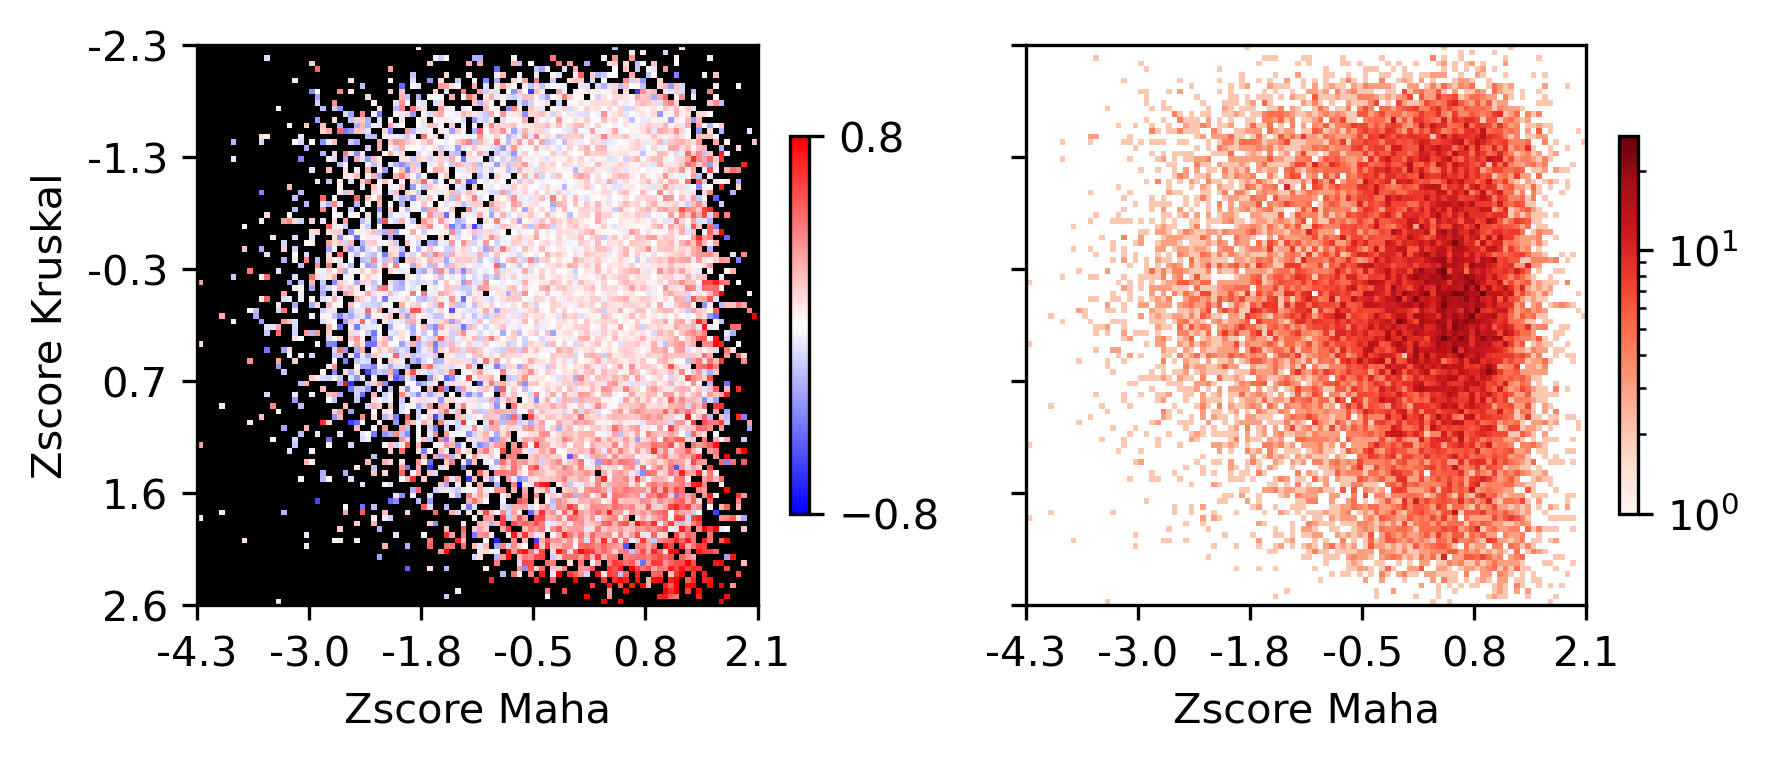

In [35]:
cmap = mpl.cm.bwr
cmap.set_bad('black', 1.0)

fig, axes = plt.subplots(1, 2, figsize=(6,3), sharex='all', sharey='all', dpi=300)
ax = axes[0]
plot = ax.imshow(groupcorr, vmin=-0.8, vmax=0.8, cmap=cmap)

cbar = fig.colorbar(plot, ax=ax, shrink=0.5, fraction=0.1)
cbar.set_ticks([-0.8, 0.8])
ax.set_xlabel('Zscore Maha')
ax.set_ylabel('Zscore Kruskal')

ax = axes[1]
plot = ax.imshow(groupcount, cmap='Reds', norm=LogNorm(vmin=1))
fig.colorbar(plot, ax=ax, shrink=0.5, fraction=0.1)
ax.set_xticks(np.arange(-0.5, 100.5, 20))
ax.set_yticks(np.arange(-0.5, 100.5, 20))
ax.set_xticklabels(np.around(groupM[np.arange(0,100.5,20).astype(int)], decimals=1))
ax.set_yticklabels(np.around(groupK[np.arange(0,100.5,20).astype(int)], decimals=1))

ax.set_xlabel('Zscore Maha')
plt.tight_layout()
# plt.savefig(f'majortype_{group_name}_comp_rna_stats_tss_corr.pdf', transparent=True)


## Differential Loop vs All Gene TSS

In [36]:
corr_all = []

In [37]:
selp = data['bin_id'].isin(selb.index[selb])
data = data.loc[selp]

In [38]:
tmp3c = tmp3c[selp]
tmprna = tmprna[selp]

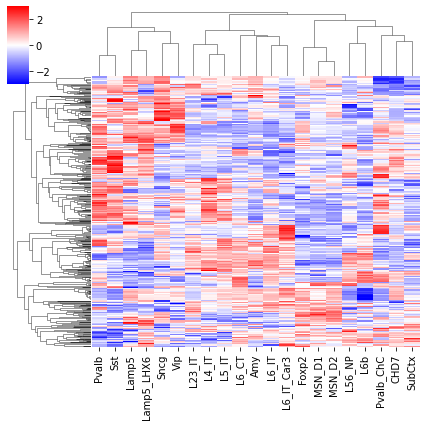

In [39]:
cg = sns.clustermap(tmp3c, cmap='bwr', vmin=-3, vmax=3, metric='cosine', xticklabels=leg, yticklabels=[], figsize=(6,6))


In [40]:
rorder = cg.dendrogram_row.reordered_ind.copy()
corder = cg.dendrogram_col.reordered_ind.copy()

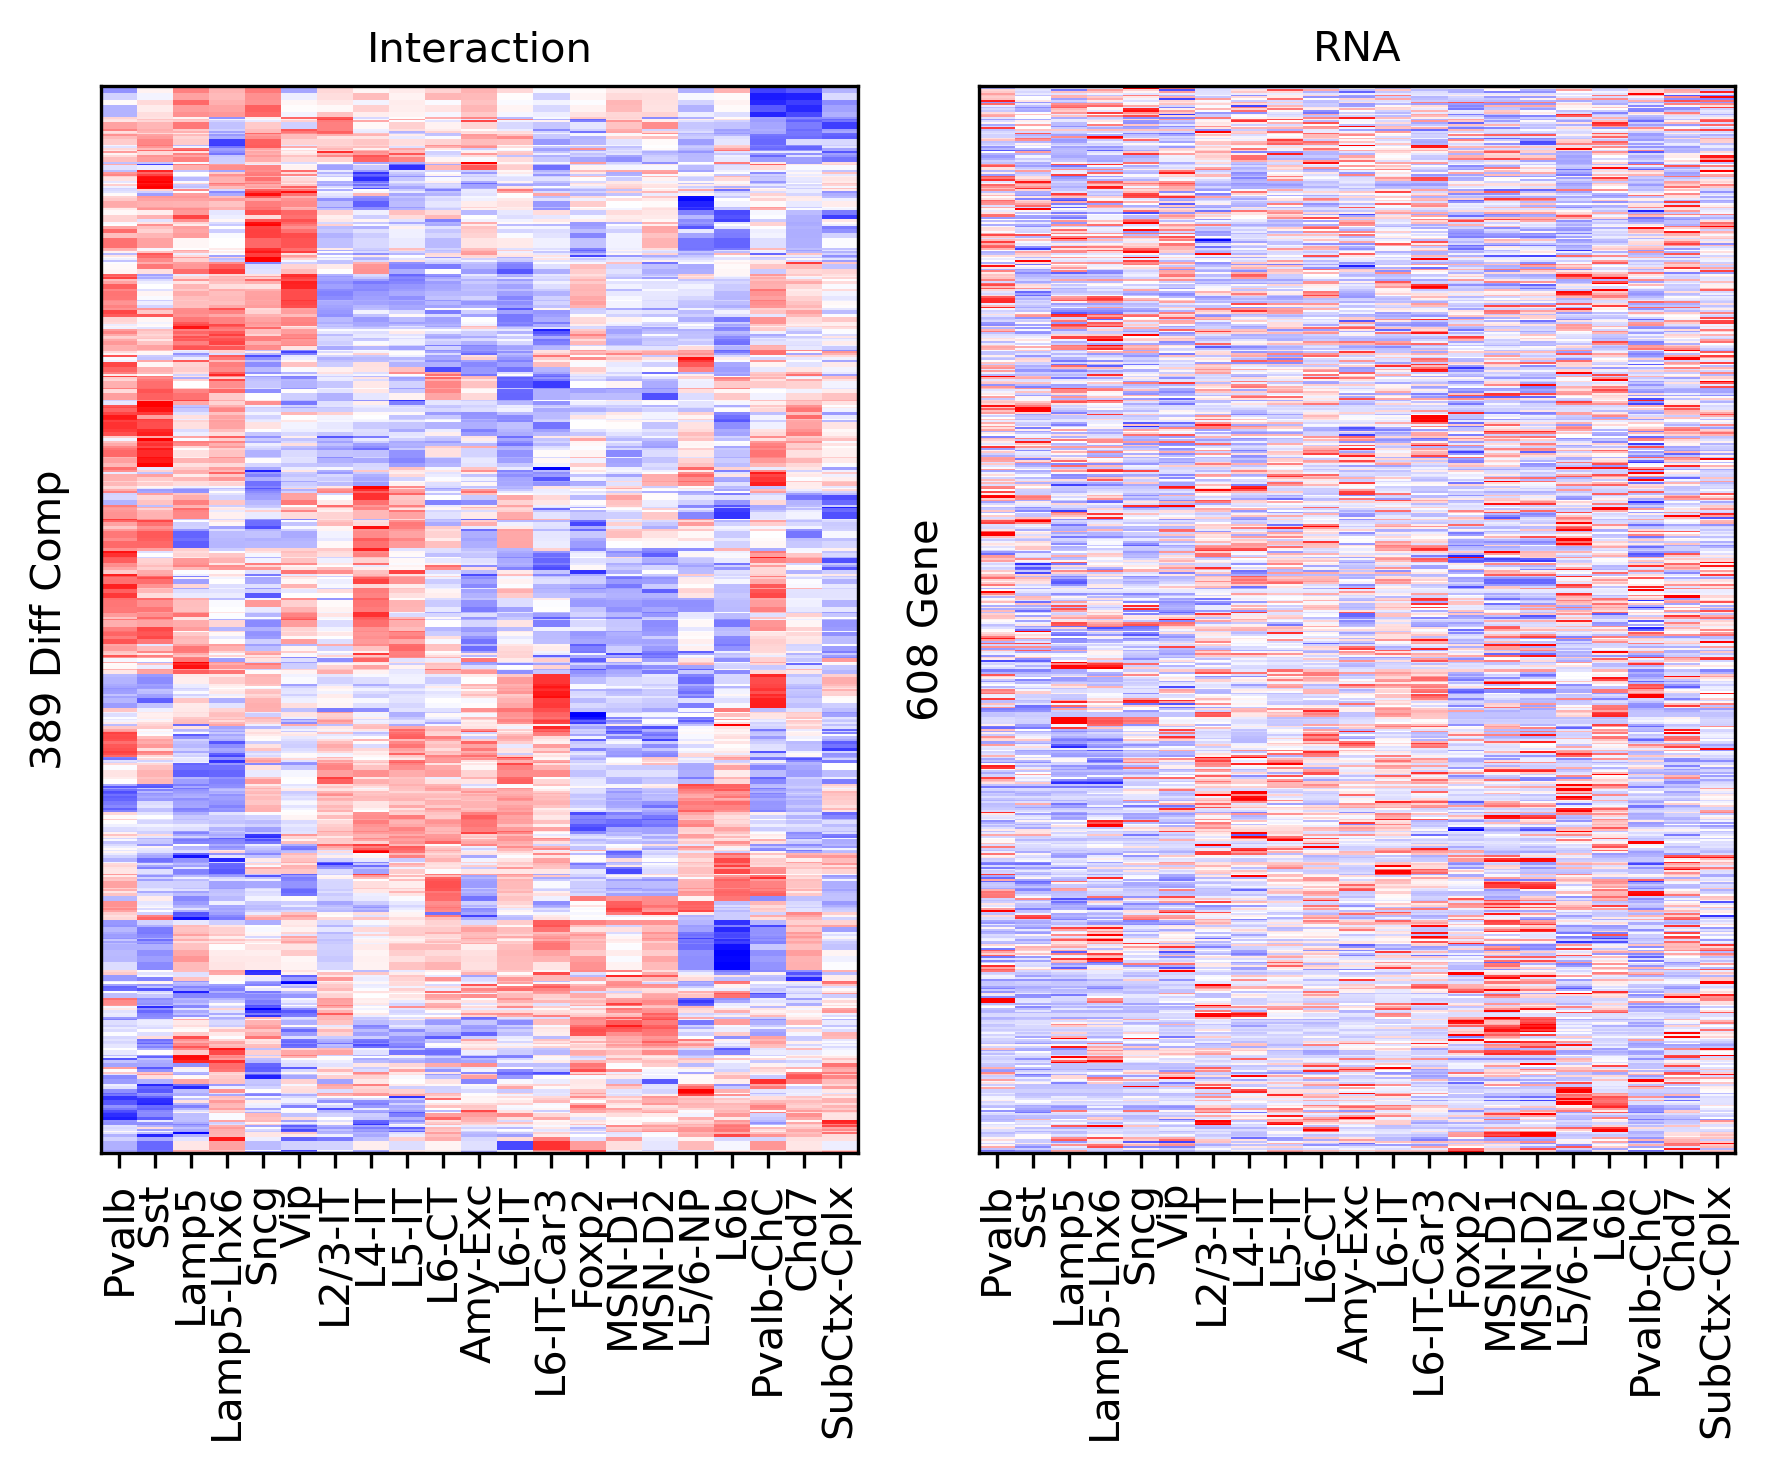

In [41]:
fig, axes = plt.subplots(1, 2, sharey='all', figsize=(6,5), dpi=300)

ax = axes[0]
ax.imshow(tmp3c[np.ix_(rorder, corder)], cmap='bwr', aspect='auto', vmin=-3, vmax=3, interpolation='none')
ax.set_title('Interaction', fontsize=10)
# sns.despine(ax=ax, left=True, bottom=True)
ax.set_xticks(np.arange(len(leg)))
ax.set_xticklabels(legname[corder], rotation=90)
ax.set_yticks([])
ax.set_ylabel(f'{np.unique(data["bin_id"]).shape[0]} Diff Comp')

ax = axes[1]
ax.imshow(tmprna[np.ix_(rorder, corder)], cmap='bwr', aspect='auto', vmin=-3, vmax=3, interpolation='none')
ax.set_title('RNA', fontsize=10)
# sns.despine(ax=ax, left=True, bottom=True)
ax.set_xticks(np.arange(len(leg)))
ax.set_xticklabels(legname[corder], rotation=90)
ax.set_ylabel(f'{np.unique(data["gene_id"]).shape[0]} Gene')

plt.tight_layout()
# plt.savefig(f'majortype_{group_name}_diffcomp_3C_RNA_alltss.pdf', transparent=True)


In [42]:
corr_all.append(data['corr'].values)


## Differential Loop vs DEG TSS

In [43]:
from scipy.stats import rankdata

deg = np.zeros(genefilter.shape[0])
for i in range(len(leg)-1):
    for j in range(i+1, len(leg)):
        tmp = np.load(f'/home/jzhou_salk_edu/sky_workdir/hba/rna_majortype/DEG/{leg[i]}-{leg[j]}.npz')
        # deg[np.logical_and(np.abs(tmp['fc'])>1, tmp['fdr']<1e-3)] = 1
        rank = rankdata(tmp['fdr'])
        deg[rank<=100] = 1

print(deg.sum())

1131.0


In [44]:
selp = data['gene_id'].isin(genefilter.index[deg==1])
data = data.loc[selp]

In [45]:
tmp3c = tmp3c[selp]
tmprna = tmprna[selp]

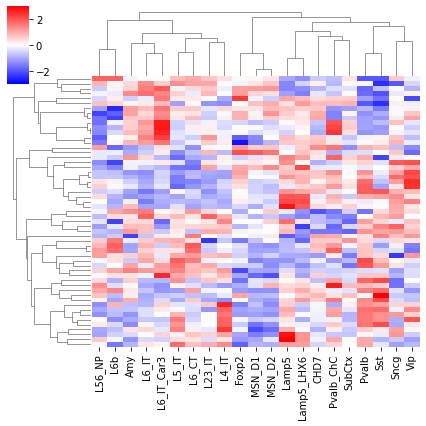

In [46]:
cg = sns.clustermap(tmp3c, cmap='bwr', vmin=-3, vmax=3, metric='cosine', xticklabels=leg, yticklabels=[], figsize=(6,6))


In [47]:
rorder = cg.dendrogram_row.reordered_ind.copy()
corder = cg.dendrogram_col.reordered_ind.copy()

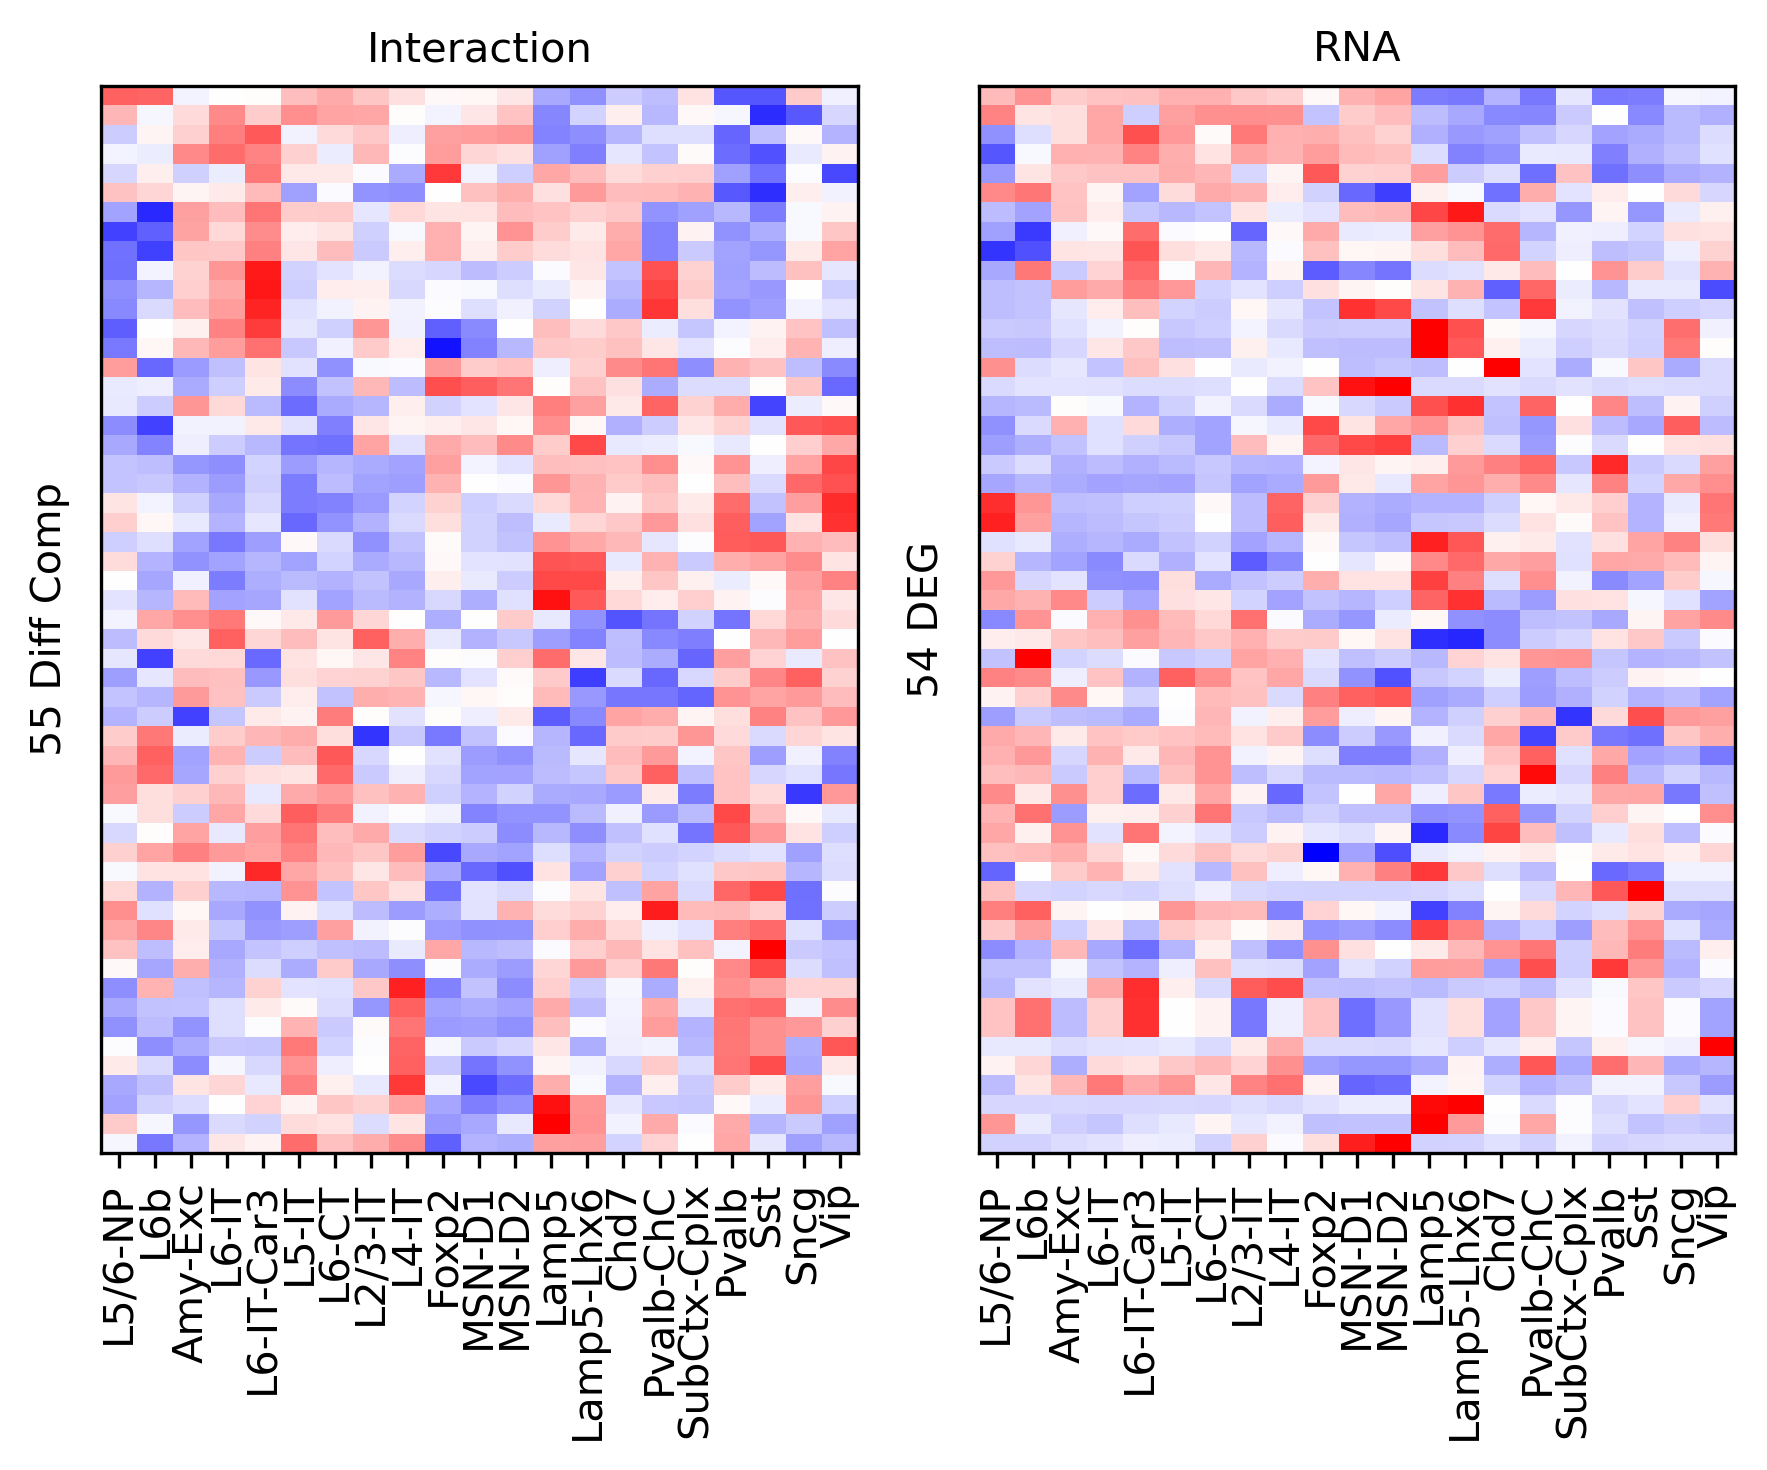

In [48]:
fig, axes = plt.subplots(1, 2, sharey='all', figsize=(6,5), dpi=300)

ax = axes[0]
ax.imshow(tmp3c[np.ix_(rorder, corder)], cmap='bwr', aspect='auto', vmin=-3, vmax=3, interpolation='none')
ax.set_title('Interaction', fontsize=10)
# sns.despine(ax=ax, left=True, bottom=True)
ax.set_xticks(np.arange(len(leg)))
ax.set_xticklabels(legname[corder], rotation=90)
ax.set_yticks([])
ax.set_ylabel(f'{np.unique(data["bin_id"]).shape[0]} Diff Comp')

ax = axes[1]
ax.imshow(tmprna[np.ix_(rorder, corder)], cmap='bwr', aspect='auto', vmin=-3, vmax=3, interpolation='none')
ax.set_title('RNA', fontsize=10)
# sns.despine(ax=ax, left=True, bottom=True)
ax.set_xticks(np.arange(len(leg)))
ax.set_xticklabels(legname[corder], rotation=90)
ax.set_ylabel(f'{np.unique(data["gene_id"]).shape[0]} DEG')

plt.tight_layout()
# plt.savefig(f'majortype_{group_name}_diffcomp_3C_RNA_degtss.pdf', transparent=True)


In [49]:
corr_all.append(data['corr'].values)


## Gene body stats vs corr

In [50]:
expr = pd.read_hdf('/home/jzhou_salk_edu/sky_workdir/hba/rna_majortype/cluster_expr.hdf')
stats = pd.read_hdf(f'/home/jzhou_salk_edu/sky_workdir/hba/rna_majortype/{group_name}_deg_stats.hdf')
genefilter = (stats['stats']>0)
expr = expr.loc[:, genefilter]
stats = stats.loc[genefilter]


In [51]:
data = pd.read_csv(f'/home/jzhou_salk_edu/sky_workdir/hba/ref/hg38.main.100kbin.gene.slop2k.txt', sep='\t', header=None, index_col=None)
data['bin_id'] = data[0] + '_' + (data[1] // res).astype(str)
data = data.rename({6:'gene_id'}, axis=1)
data = data.loc[(data['bin_id'].isin(binall.index)) & (data['gene_id'].isin(stats.index))]
data['maha'] = binall.loc[data['bin_id'].values, 'sample_maha'].values
data['kruskal'] = stats.loc[data['gene_id'].values, 'stats'].values


In [52]:
tmp3c = comp.loc[data['bin_id'].values].values
tmp3c = zscore(tmp3c, axis=1)


In [53]:
tmprna = expr.loc[leg, data['gene_id'].values].T.values
tmprna = zscore(tmprna, axis=1)


In [54]:
data['corr'] = [pearsonr(xx, yy)[0] for xx,yy in zip(tmp3c, tmprna)]

In [55]:
data = data.drop([0,1,2,3,4,5,7,8], axis=1)
data

,gene_id,bin_id,maha,kruskal,corr
162,ENSG00000231050.1,chr1_18,0.018071,106.481967,0.150721
163,ENSG00000078369.18,chr1_18,0.018071,236.559842,0.219052
164,ENSG00000169885.10,chr1_19,0.119261,86.157369,-0.337049
165,ENSG00000178821.13,chr1_19,0.119261,190.731327,-0.166029
166,ENSG00000142609.18,chr1_19,0.119261,1768.295474,-0.732037
...,...,...,...,...,...
83189,ENSG00000185386.15,chr22_502,188.442765,2880.146129,-0.079567
83190,ENSG00000196576.15,chr22_502,188.442765,886.926867,0.031787
83191,ENSG00000170638.9,chr22_502,188.442765,558.461760,-0.318543
83192,ENSG00000273253.2,chr22_502,188.442765,511.799988,0.049380


<AxesSubplot:xlabel='maha', ylabel='kruskal'>

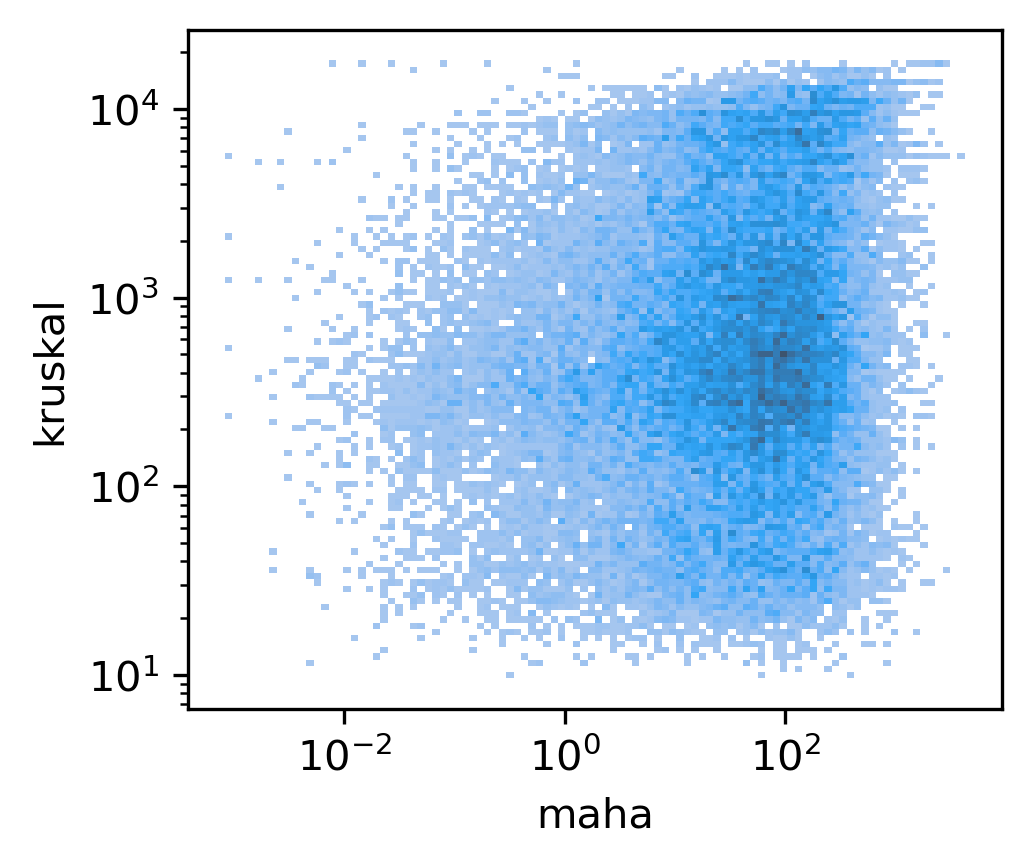

In [56]:
fig, ax = plt.subplots(figsize=(3.5,3), dpi=300)
sns.histplot(data, x='maha', y='kruskal', bins=100, ax=ax, log_scale=(10,10))


In [57]:
data['maha_group'], groupM = pd.cut(zscore(np.log10(data['maha'])), 100, labels=False, retbins=True)
data['kruskal_group'], groupK = pd.cut(zscore(np.log10(data['kruskal'])), 100, labels=False, retbins=True)


In [58]:
tmp = data.groupby(['maha_group','kruskal_group'])['corr'].mean()
groupcorr = np.zeros((100, 100)) / 0
groupcorr[(tmp.index.get_level_values('kruskal_group'), tmp.index.get_level_values('maha_group'))] = tmp.values


In [59]:
tmp = data.groupby(['maha_group','kruskal_group'])['corr'].count()
groupcount = np.zeros((100, 100))
groupcount[(tmp.index.get_level_values('kruskal_group'), tmp.index.get_level_values('maha_group'))] = tmp.values + 1


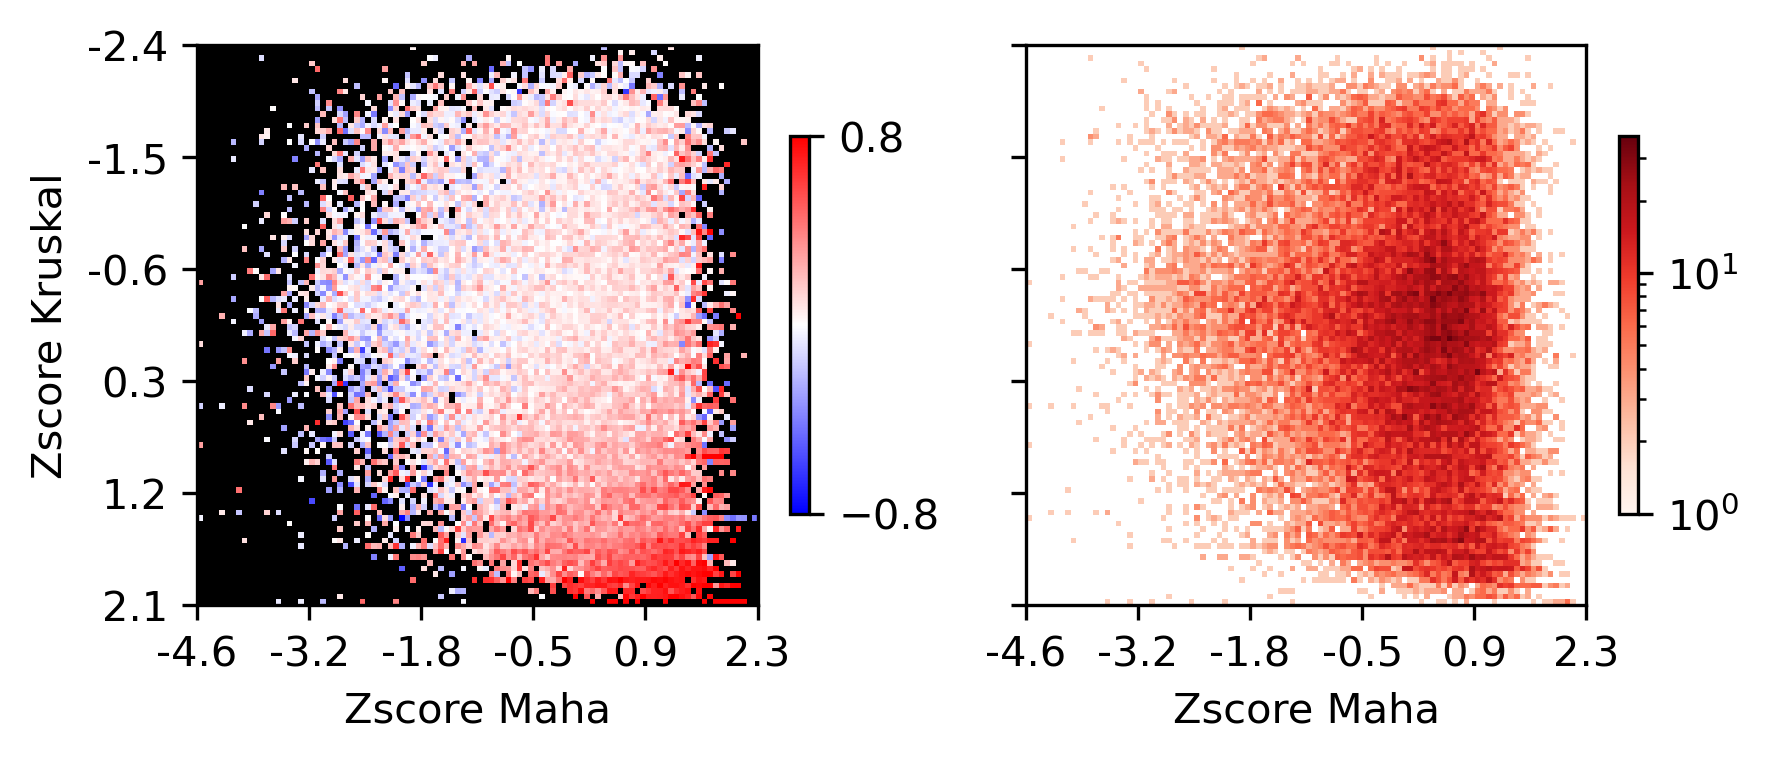

In [60]:
cmap = mpl.cm.bwr
cmap.set_bad('black', 1.0)

fig, axes = plt.subplots(1, 2, figsize=(6,3), sharex='all', sharey='all', dpi=300)
ax = axes[0]
plot = ax.imshow(groupcorr, vmin=-0.8, vmax=0.8, cmap=cmap)

cbar = fig.colorbar(plot, ax=ax, shrink=0.5, fraction=0.1)
cbar.set_ticks([-0.8, 0.8])
ax.set_xlabel('Zscore Maha')
ax.set_ylabel('Zscore Kruskal')

ax = axes[1]
plot = ax.imshow(groupcount, cmap='Reds', norm=LogNorm(vmin=1))
fig.colorbar(plot, ax=ax, shrink=0.5, fraction=0.1)
ax.set_xticks(np.arange(-0.5, 100.5, 20))
ax.set_yticks(np.arange(-0.5, 100.5, 20))
ax.set_xticklabels(np.around(groupM[np.arange(0,100.5,20).astype(int)], decimals=1))
ax.set_yticklabels(np.around(groupK[np.arange(0,100.5,20).astype(int)], decimals=1))

ax.set_xlabel('Zscore Maha')
plt.tight_layout()
# plt.savefig(f'majortype_{group_name}_comp_rna_stats_genebody_corr.pdf', transparent=True)


## Differential Loop vs All Gene Body

In [61]:
selp = data['bin_id'].isin(selb.index[selb])
data = data.loc[selp]

In [62]:
tmp3c = tmp3c[selp]
tmprna = tmprna[selp]

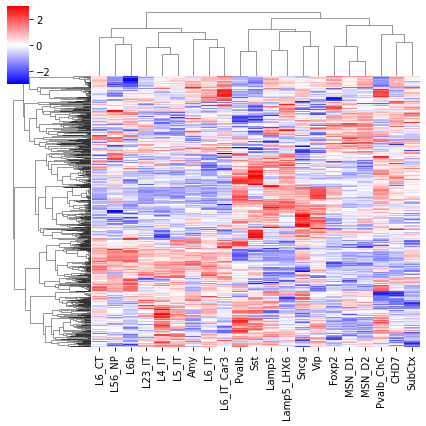

In [63]:
cg = sns.clustermap(tmp3c, cmap='bwr', vmin=-3, vmax=3, metric='cosine', xticklabels=leg, yticklabels=[], figsize=(6,6))


In [64]:
rorder = cg.dendrogram_row.reordered_ind.copy()
corder = cg.dendrogram_col.reordered_ind.copy()

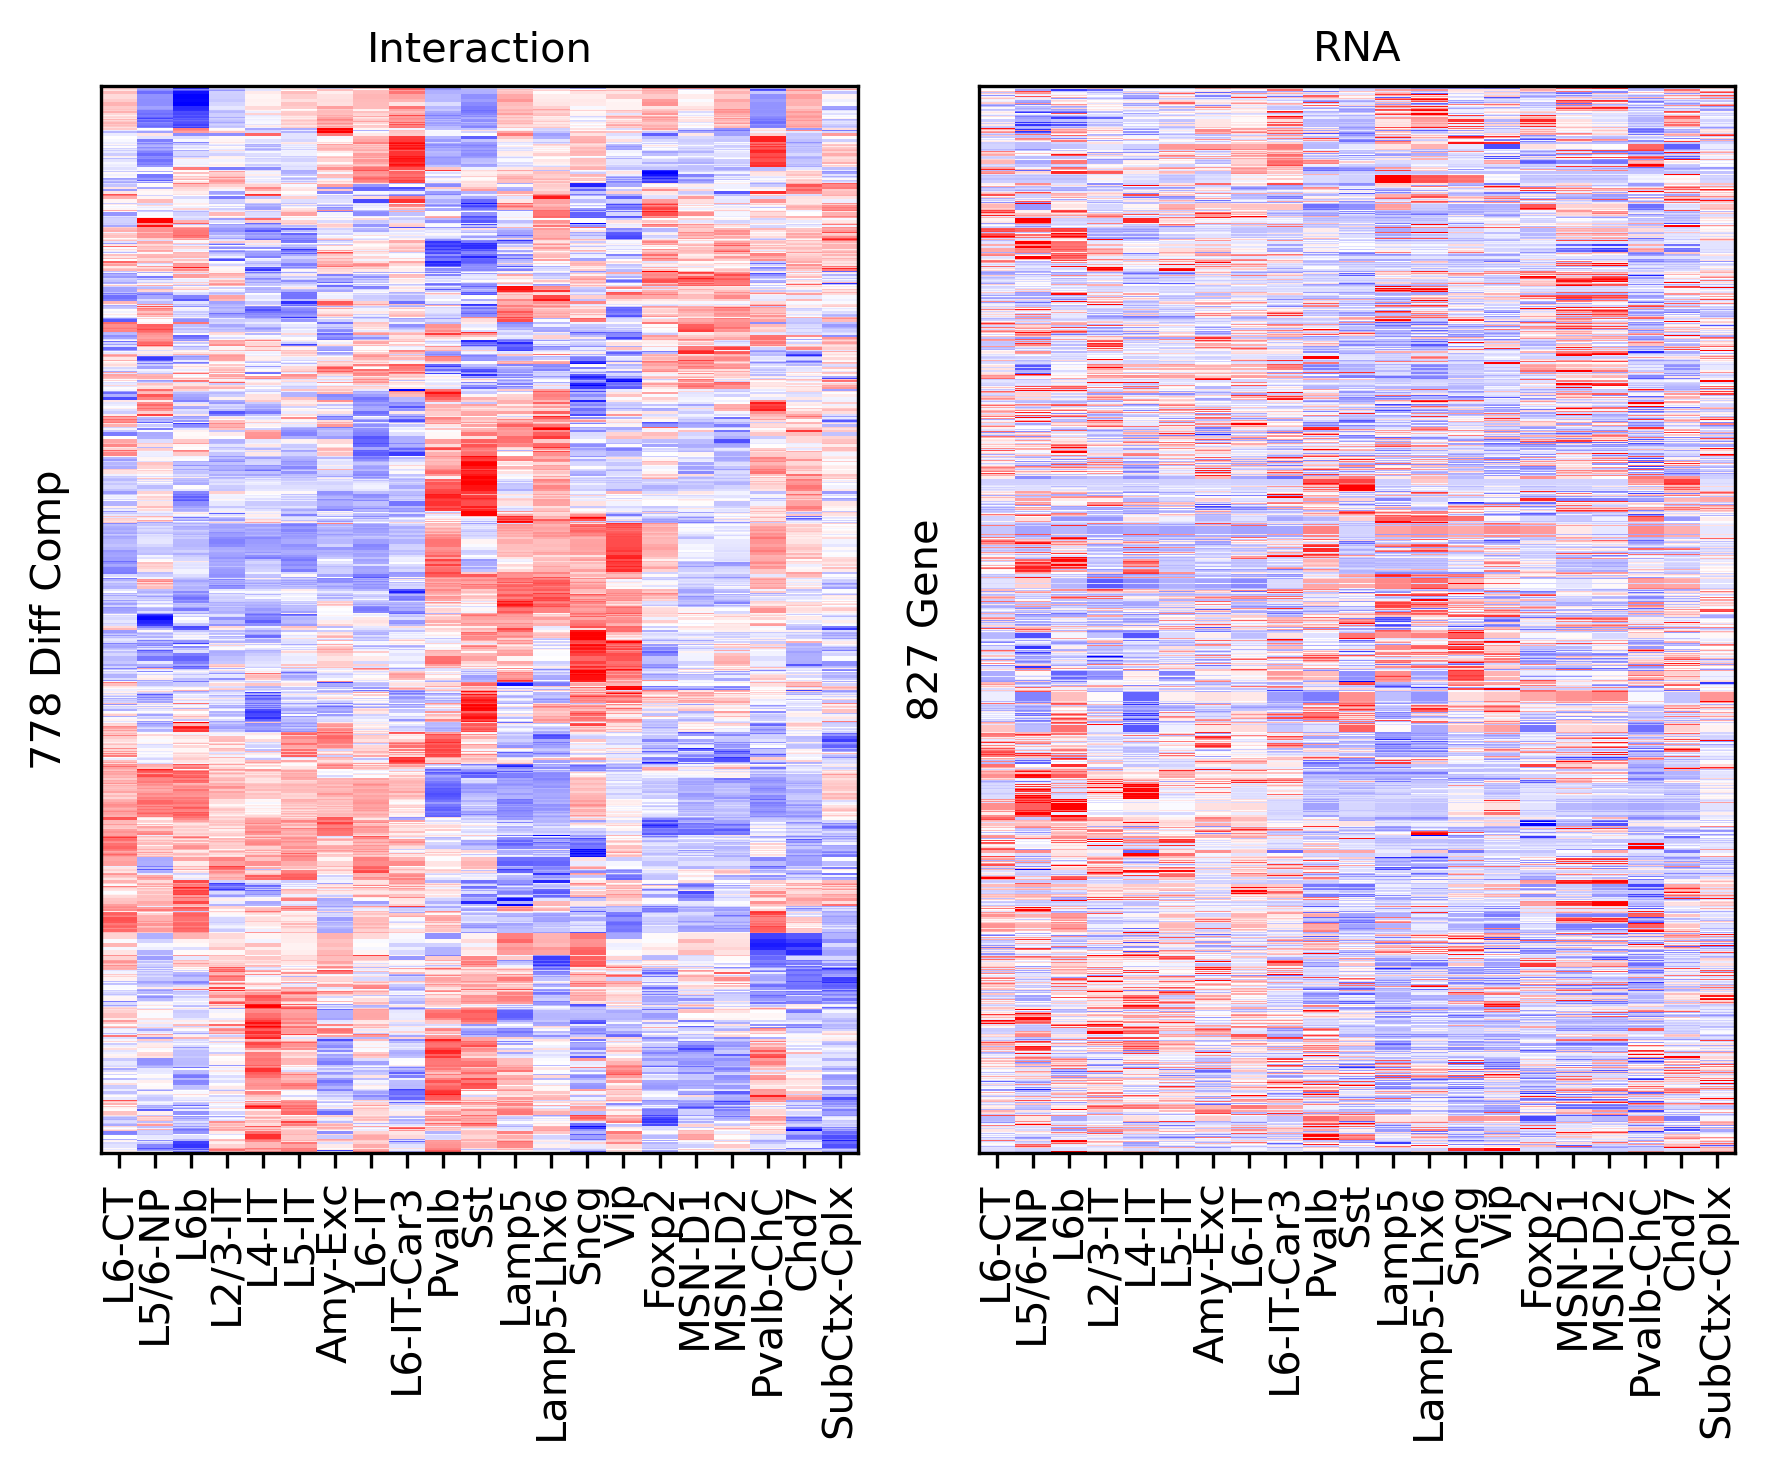

In [65]:
fig, axes = plt.subplots(1, 2, sharey='all', figsize=(6,5), dpi=300)

ax = axes[0]
ax.imshow(tmp3c[np.ix_(rorder, corder)], cmap='bwr', aspect='auto', vmin=-3, vmax=3, interpolation='none')
ax.set_title('Interaction', fontsize=10)
# sns.despine(ax=ax, left=True, bottom=True)
ax.set_xticks(np.arange(len(leg)))
ax.set_xticklabels(legname[corder], rotation=90)
ax.set_yticks([])
ax.set_ylabel(f'{np.unique(data["bin_id"]).shape[0]} Diff Comp')

ax = axes[1]
ax.imshow(tmprna[np.ix_(rorder, corder)], cmap='bwr', aspect='auto', vmin=-3, vmax=3, interpolation='none')
ax.set_title('RNA', fontsize=10)
# sns.despine(ax=ax, left=True, bottom=True)
ax.set_xticks(np.arange(len(leg)))
ax.set_xticklabels(legname[corder], rotation=90)
ax.set_ylabel(f'{np.unique(data["gene_id"]).shape[0]} Gene')

plt.tight_layout()
# plt.savefig(f'majortype_{group_name}_diffcomp_3C_RNA_allbody.pdf', transparent=True)


In [66]:
corr_all.append(data['corr'].values)


## Differential Loop vs DEG Gene Body

In [67]:
from scipy.stats import rankdata

deg = np.zeros(genefilter.shape[0])
for i in range(len(leg)-1):
    for j in range(i+1, len(leg)):
        tmp = np.load(f'/home/jzhou_salk_edu/sky_workdir/hba/rna_majortype/DEG/{leg[i]}-{leg[j]}.npz')
        # deg[np.logical_and(np.abs(tmp['fc'])>1, tmp['fdr']<1e-3)] = 1
        rank = rankdata(tmp['fdr'])
        deg[rank<=100] = 1

print(deg.sum())

1131.0


In [68]:
selp = data['gene_id'].isin(genefilter.index[deg==1])
data = data.loc[selp]

In [69]:
tmp3c = tmp3c[selp]
tmprna = tmprna[selp]

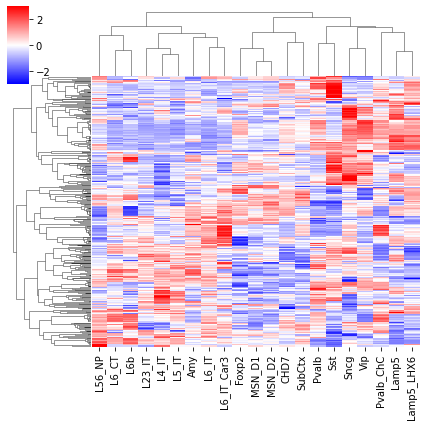

In [70]:
cg = sns.clustermap(tmp3c, cmap='bwr', vmin=-3, vmax=3, metric='cosine', xticklabels=leg, yticklabels=[], figsize=(6,6))


In [71]:
rorder = cg.dendrogram_row.reordered_ind.copy()
corder = cg.dendrogram_col.reordered_ind.copy()

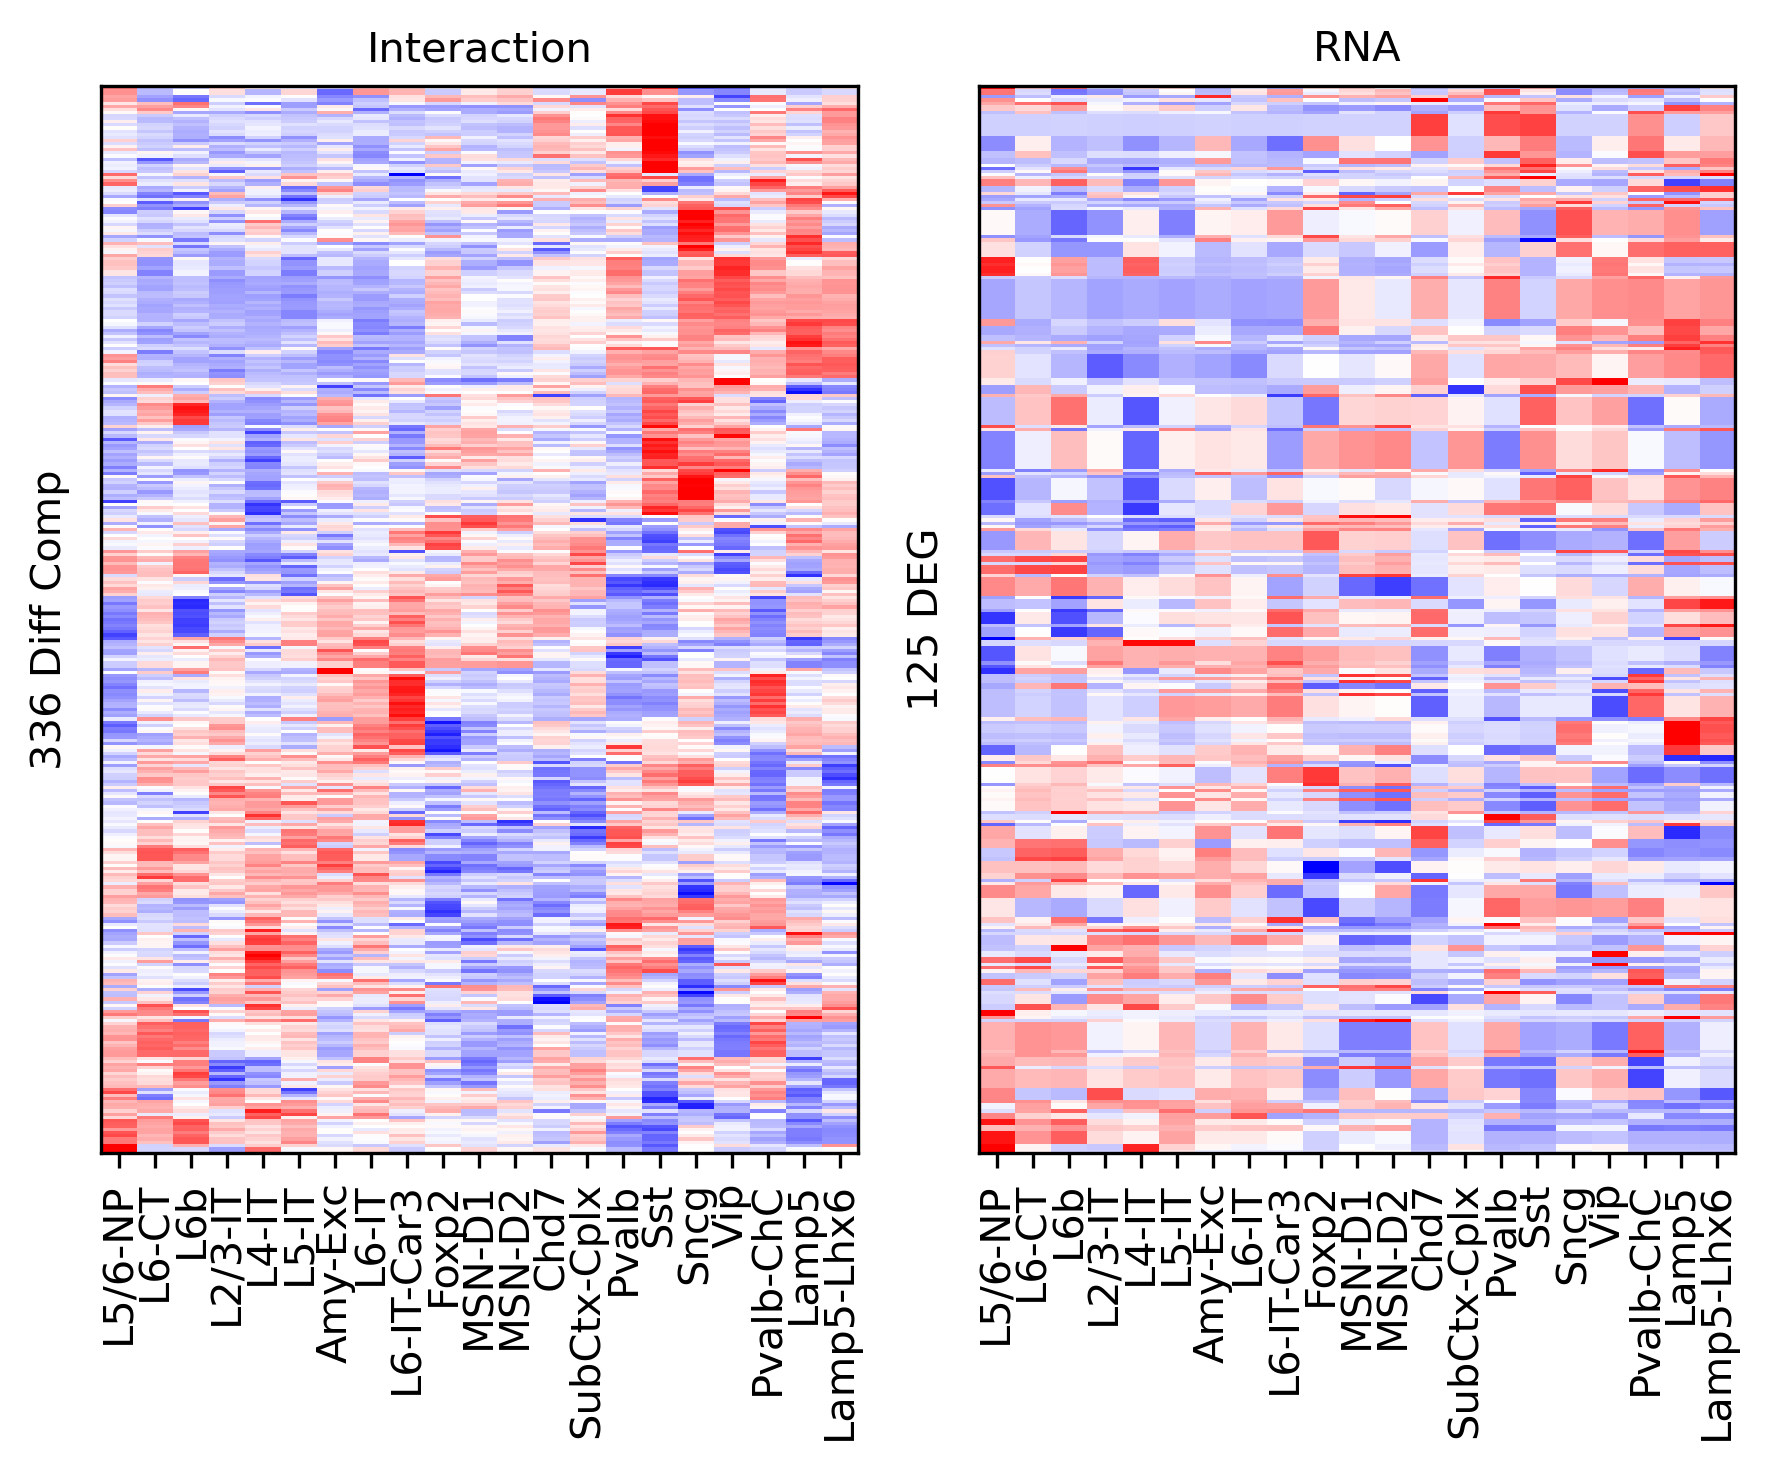

In [72]:
fig, axes = plt.subplots(1, 2, sharey='all', figsize=(6,5), dpi=300)

ax = axes[0]
ax.imshow(tmp3c[np.ix_(rorder, corder)], cmap='bwr', aspect='auto', vmin=-3, vmax=3, interpolation='none')
ax.set_title('Interaction', fontsize=10)
# sns.despine(ax=ax, left=True, bottom=True)
ax.set_xticks(np.arange(len(leg)))
ax.set_xticklabels(legname[corder], rotation=90)
ax.set_yticks([])
ax.set_ylabel(f'{np.unique(data["bin_id"]).shape[0]} Diff Comp')

ax = axes[1]
ax.imshow(tmprna[np.ix_(rorder, corder)], cmap='bwr', aspect='auto', vmin=-3, vmax=3, interpolation='none')
ax.set_title('RNA', fontsize=10)
# sns.despine(ax=ax, left=True, bottom=True)
ax.set_xticks(np.arange(len(leg)))
ax.set_xticklabels(legname[corder], rotation=90)
ax.set_ylabel(f'{np.unique(data["gene_id"]).shape[0]} DEG')

plt.tight_layout()
# plt.savefig(f'majortype_{group_name}_diffcomp_3C_RNA_degbody.pdf', transparent=True)


In [73]:
corr_all.append(data['corr'].values)


In [74]:
np.save(f'{outdir}corr_diffcomp_rna.npy', corr_all)


In [75]:
corr_all = np.load(f'{outdir}corr_diffcomp_rna.npy', allow_pickle=True)[[0,2,1,3]]


Text(0, 0.5, 'PCC with Comp Score')

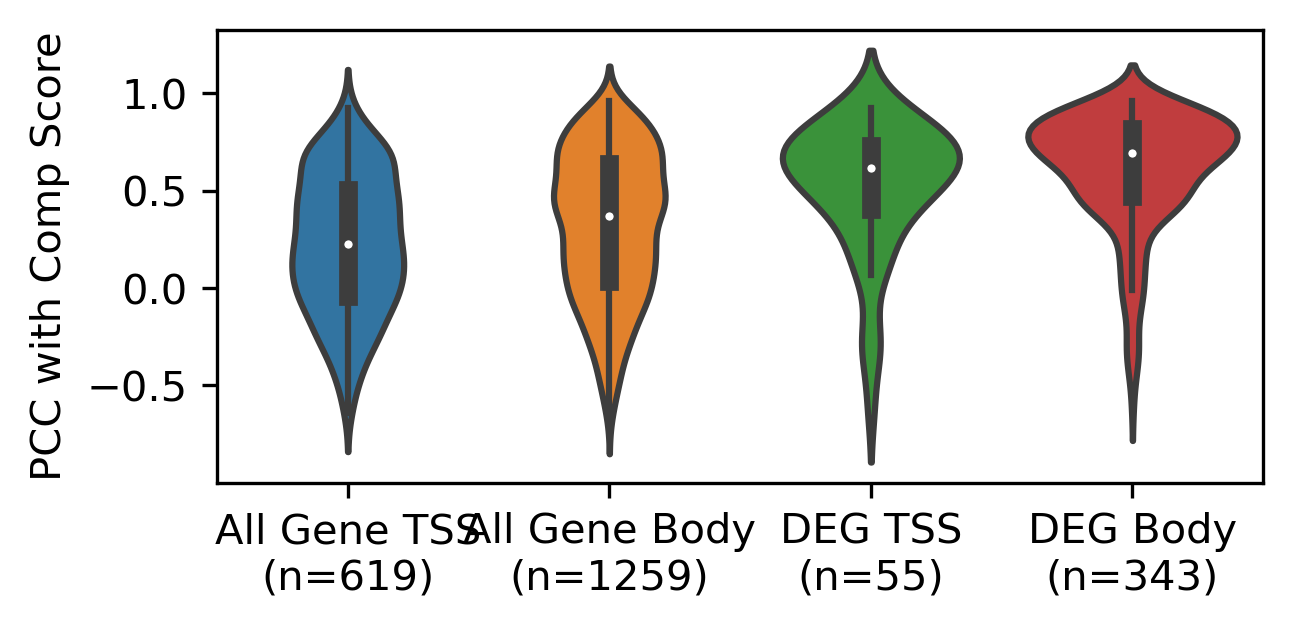

In [76]:
xleg = [f'{xx}\n(n={yy.shape[0]})' for xx,yy in zip(['All Gene TSS', 'All Gene Body', 'DEG TSS', 'DEG Body'], corr_all)]
fig, ax = plt.subplots(figsize=(4.5,2), dpi=300)
sns.violinplot(corr_all, ax=ax)
ax.set_xticklabels(xleg)
ax.set_ylabel('PCC with Comp Score')
# plt.tight_layout()
# plt.savefig(f'majortype_{group_name}_diffcomp_rnacorr.pdf', transparent=True)


In [77]:
[[xx.shape, np.median(xx)] for xx in corr_all]

[[(619,), 0.22421256812286858],
 [(1259,), 0.3712759844336564],
 [(55,), 0.6189163369194299],
 [(343,), 0.6938648902429384]]